## Sample GP - Sparse (FITC, VFE)

Here's a list of sparse GPs implemented in gpx.py (type2 interface).

- gpx.sparse_fitc (FITC)
- gpx.sparse_vfe (VFE)

These functions only return cov_factor(W) and cov_diag(D). You will need the LowRankMultivariateNormal distribution to sample GP with these parameters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import jax
import jax.numpy as jnp
import numpyro
import numpyro.distributions as dist

from toygp import gpx, kernels

## Define Input

In [2]:
num_data = 100

X = dist.Uniform().sample(jax.random.PRNGKey(0), sample_shape=(num_data,))
X = 10 * jnp.sort(X)
X = X[:, None]
X.shape

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


(100, 1)

## Define Inducing Points

In [3]:
num_inducing_pts = 20

Xu = jnp.linspace(0, 10, num_inducing_pts)
Xu = Xu[:, None]
Xu.shape

(20, 1)

## Define Kernel Function

In [4]:
length_scale = 1

kf = lambda x, y : kernels.rbf(x, y, length_scale)

## Sparse GP - FITC

In [5]:
num_gp_samples = 5
noise_sd = 0.01

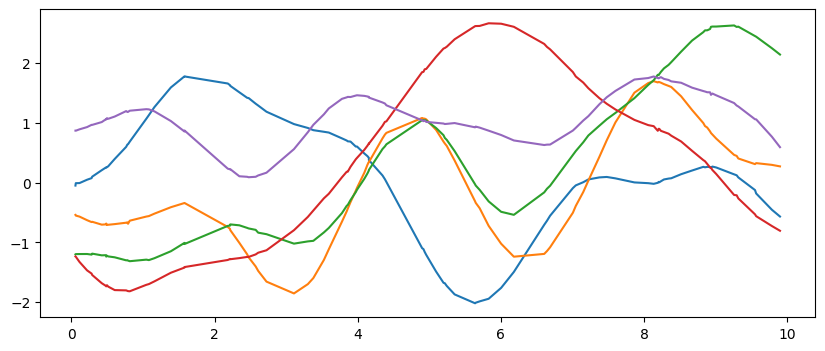

In [6]:
W, D = gpx.sparse_fitc(kf, X, Xu, noise_sd)

dist_gp = dist.LowRankMultivariateNormal(loc=jnp.zeros(num_data), cov_factor=W, cov_diag=D)

f = dist_gp.sample(jax.random.PRNGKey(1), sample_shape=(num_gp_samples,))

plt.figure(figsize=(10, 4))
plt.plot(X, f.T)
plt.show()

## Sparse GP - VFE

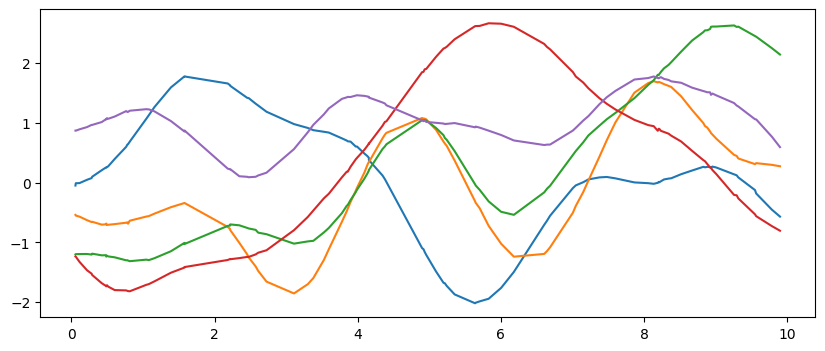

In [7]:
W, D = gpx.sparse_vfe(kf, X, Xu, noise_sd)

dist_gp = dist.LowRankMultivariateNormal(loc=jnp.zeros(num_data), cov_factor=W, cov_diag=D)

f = dist_gp.sample(jax.random.PRNGKey(1), sample_shape=(num_gp_samples,))

plt.figure(figsize=(10, 4))
plt.plot(X, f.T)
plt.show()